<a href="https://colab.research.google.com/github/shakibHossain/A-Simple-Messaging-Application/blob/master/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part A - Define Your Problem

For this assignment, the first task is chosen. The task here is to scrape two youtube accounts and print the subscriber difference. The youtube accounts that are chosen are "thenewboston" and "Traversy Media". Both accounts feature computer science related tutorials. It would be interesting to compare these similar accounts. Details such as when they started, what kind of tutorials they mostly upload, etc can be looked into; but the focus here is the subscriber count difference. About sections of both accounts show they started around the same time; "thenewboston" started in 2008 and "Traversy Media" started in 2009. Over the years, which account has outgrown the other in terms of subscribers?  

# Part B - Exploring the Source Code

The html tags to be scrapped are identified in this section. Initially, the number of subscribers below the title "thenewboston" in the about page was selected as can be seen in the screenshot below . The tag selected was <yt-formatted-string> with id="subscriber-count". 

In [0]:
from google.colab import files
from IPython.display import Image

In [0]:
uploaded = files.upload()

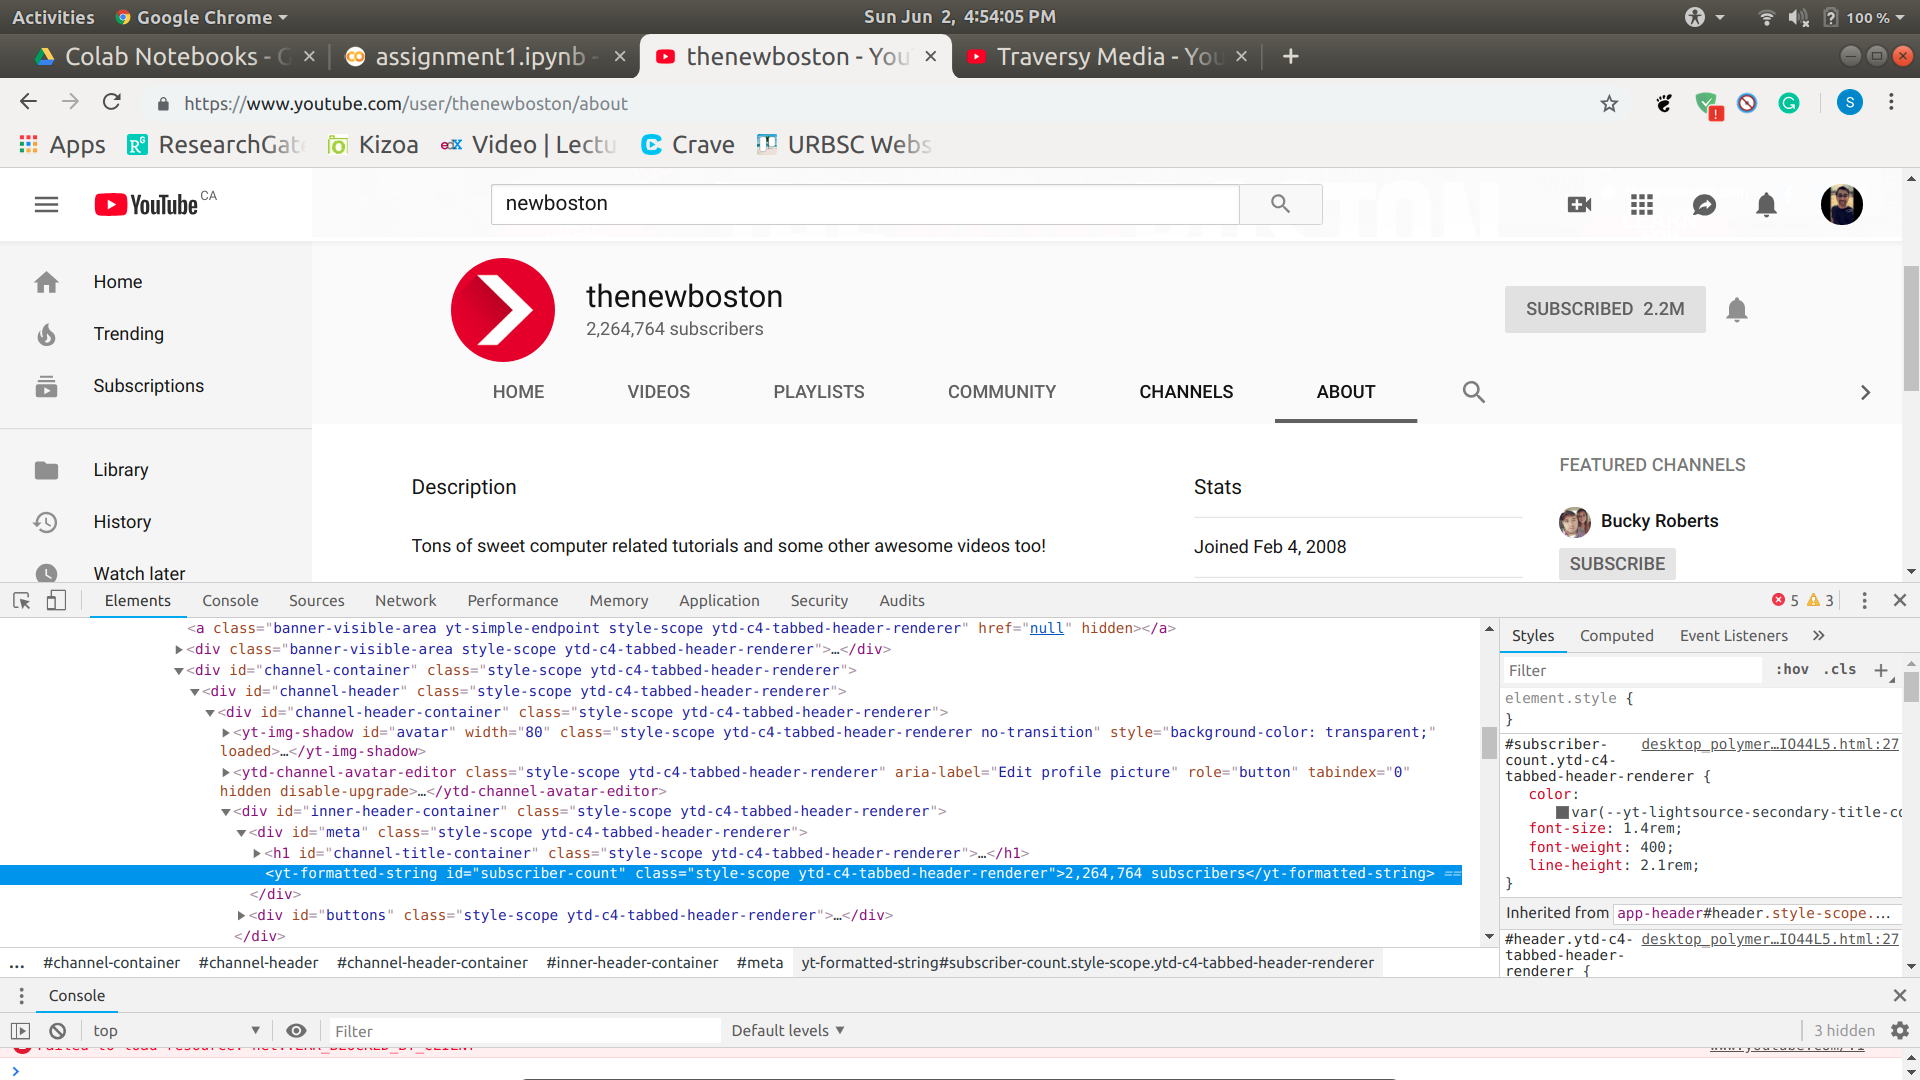

In [0]:
Image('1.png', width="800")

Unfortunately, no output was printed when this tag is scrapped as can be seen the below screenshot. 


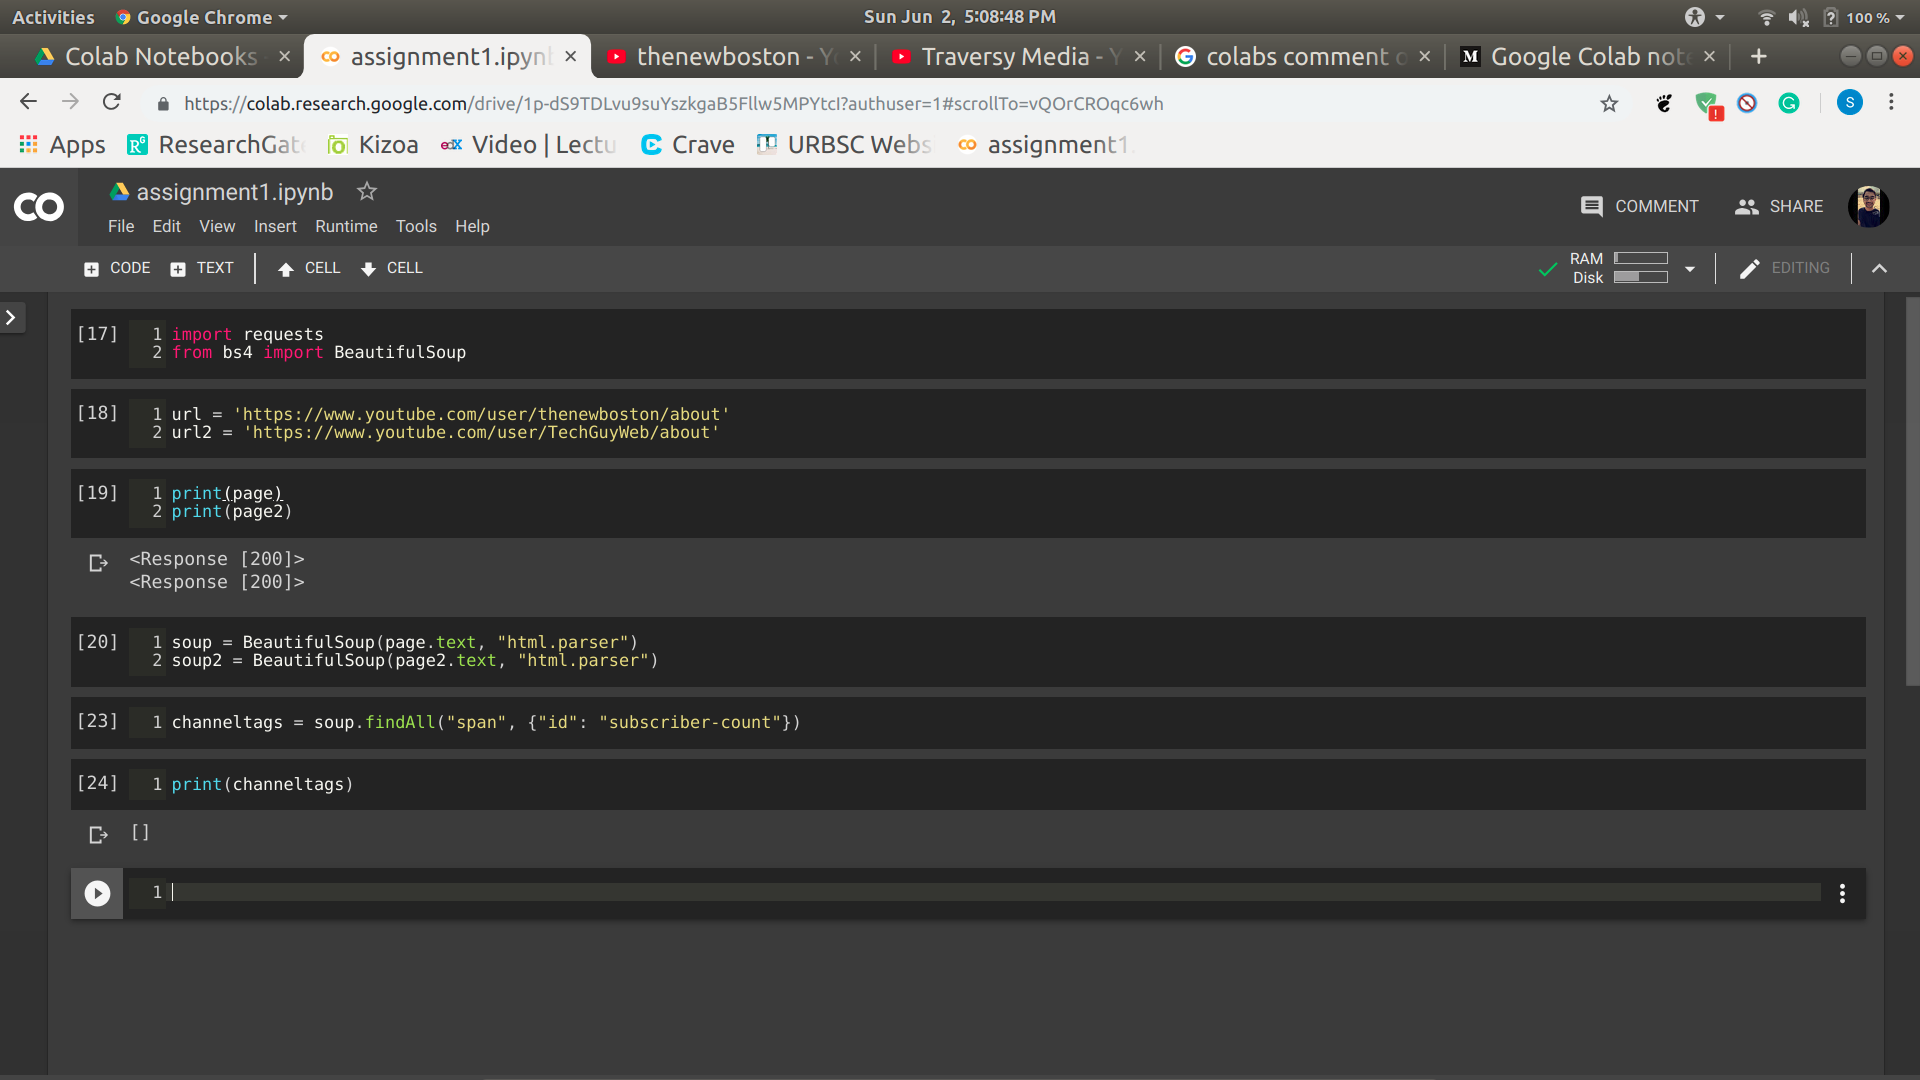

In [0]:
Image('3.png', width="800")

Then, all span tags were printed. 

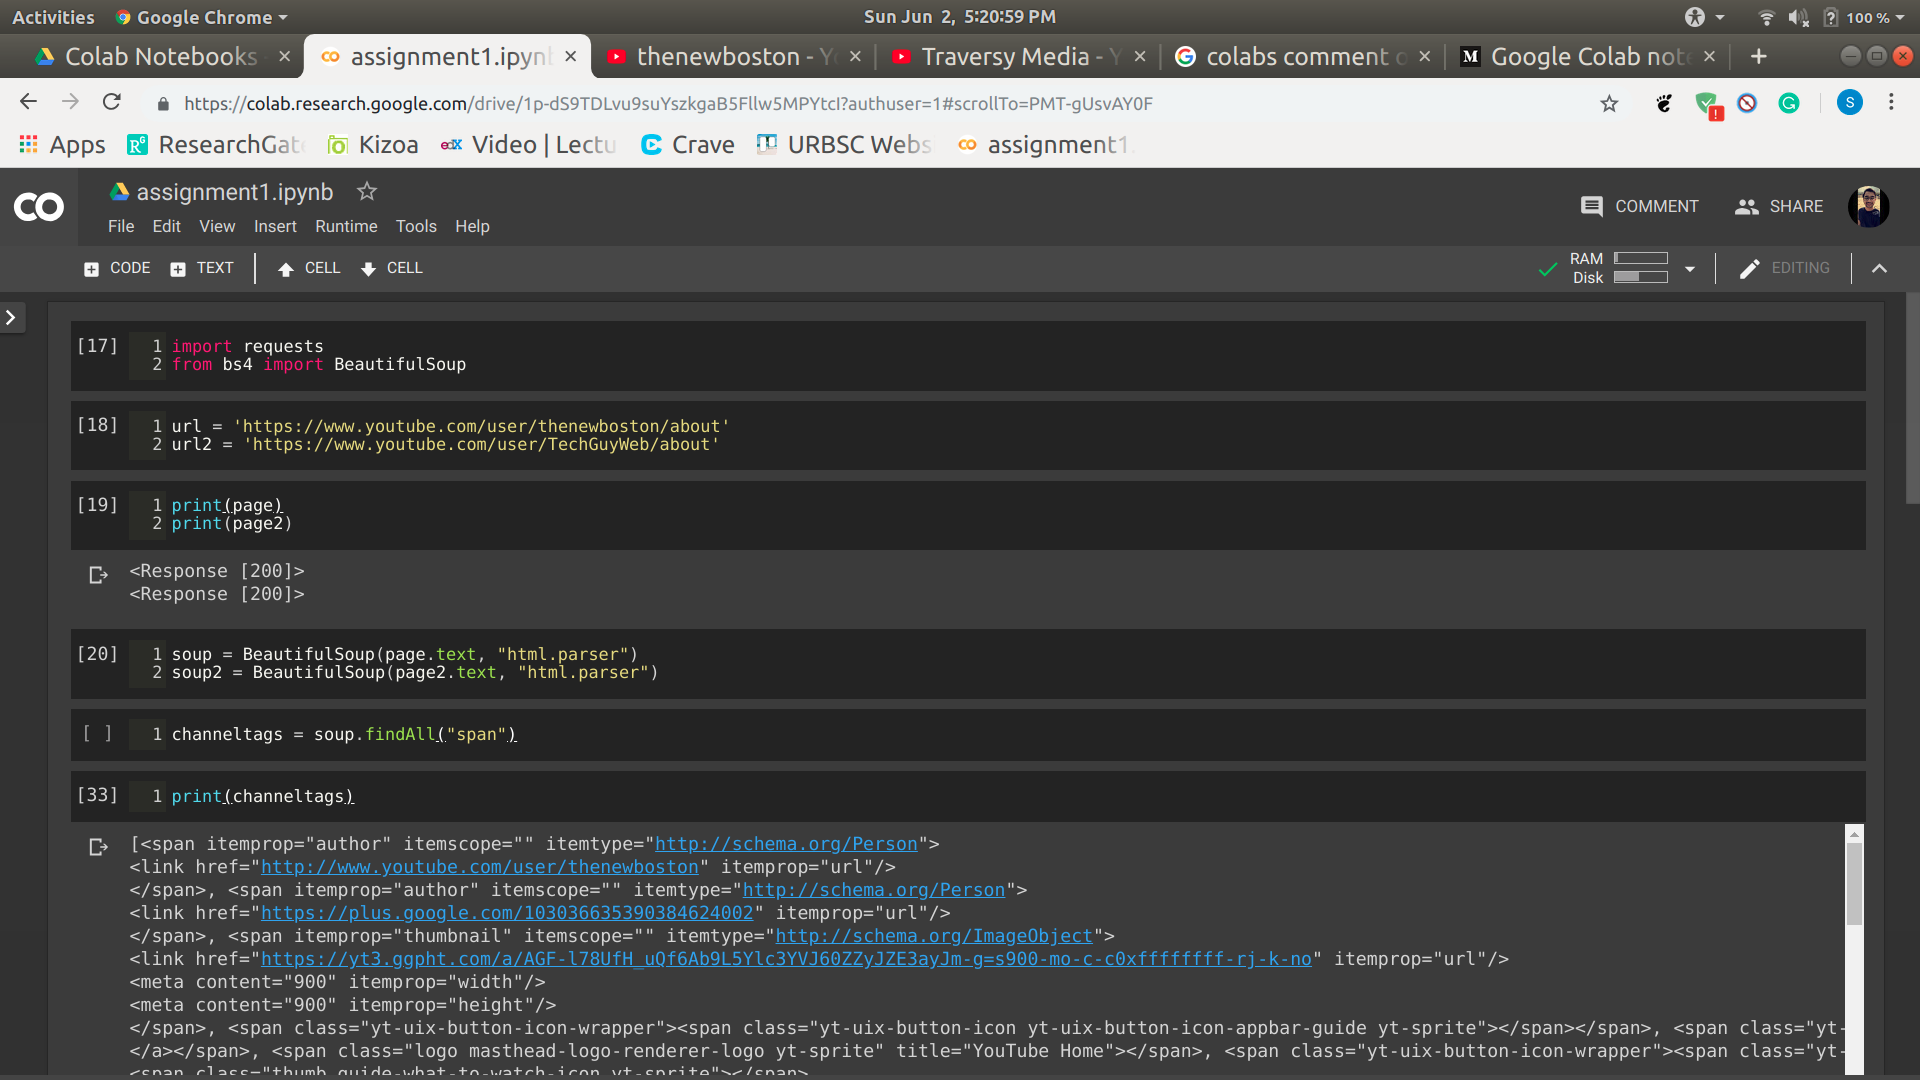

In [0]:
Image('4.png', width="800")

I searched for about tags. Found "about-stat" class.

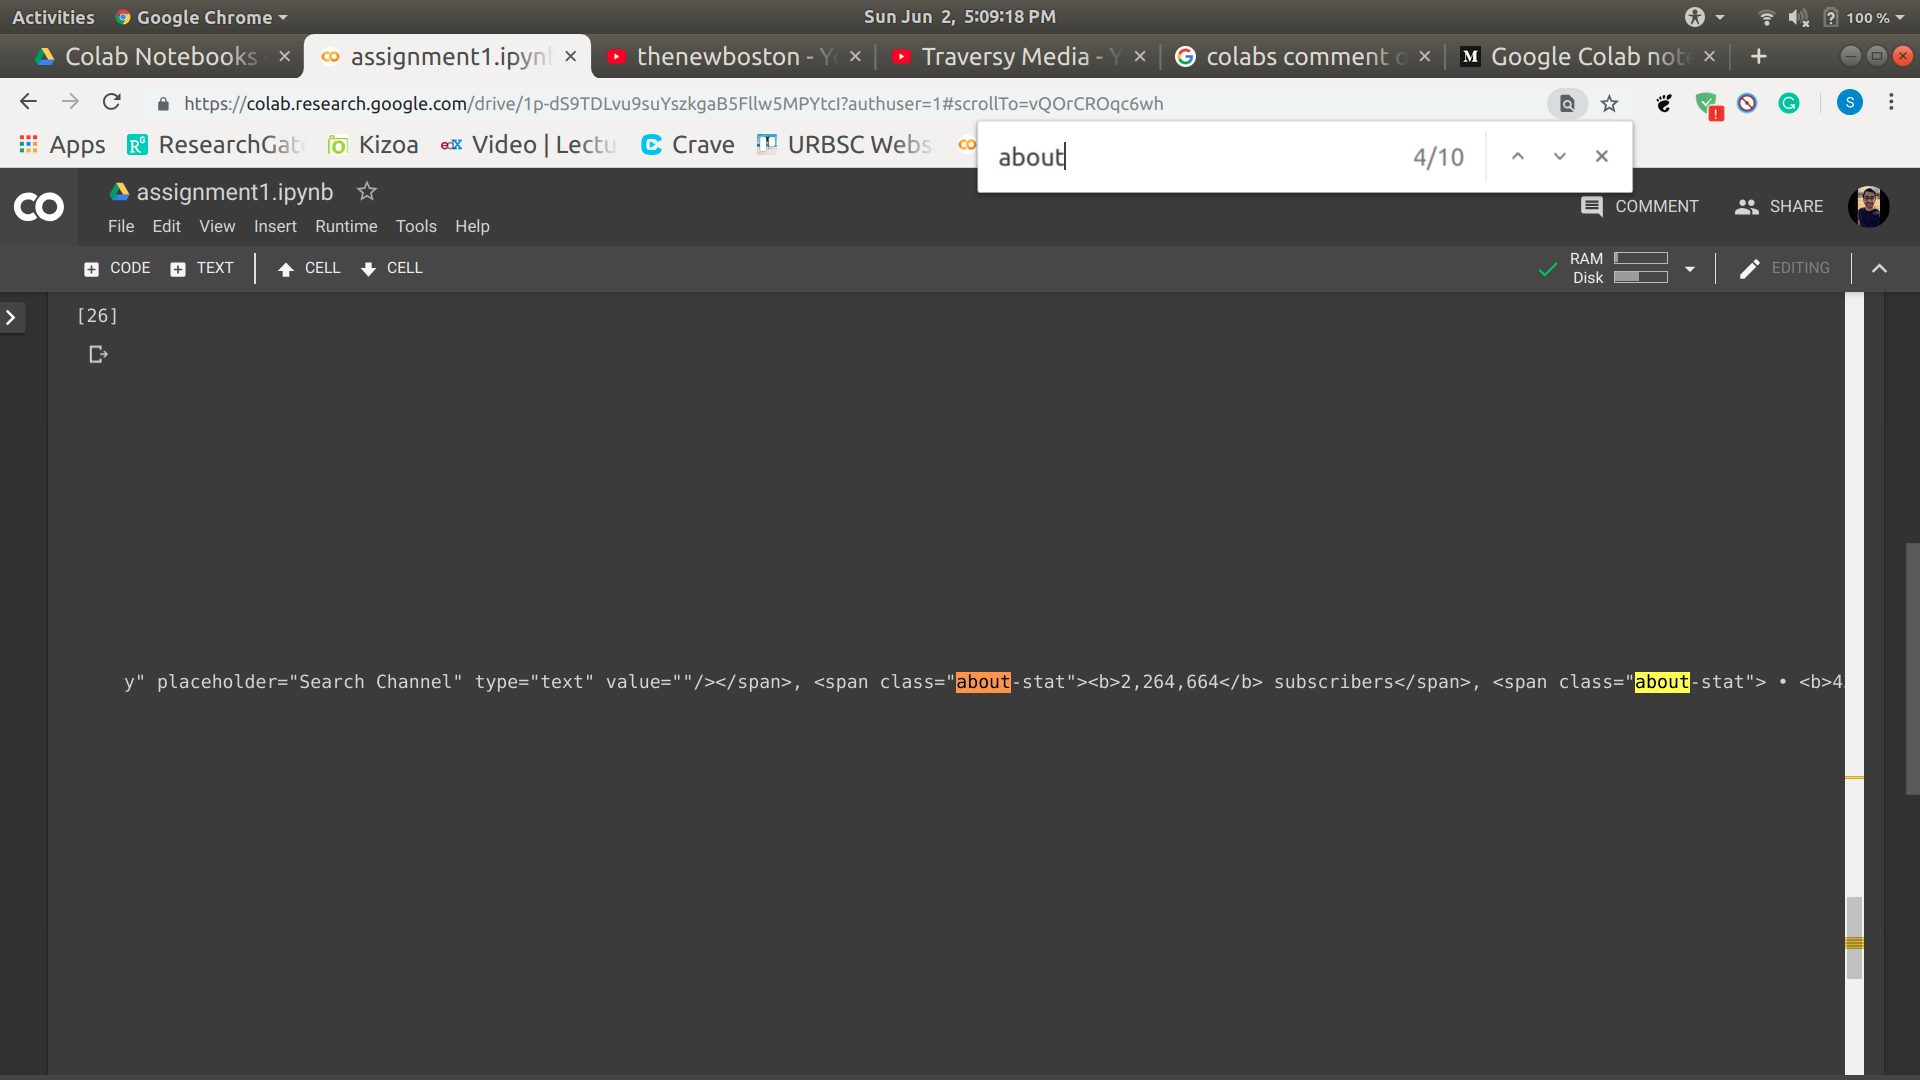

In [0]:
Image('5.png', width="800")

# Part C - Write the Scrapper

In [0]:
import requests
from bs4 import BeautifulSoup

In [0]:
url = 'https://www.youtube.com/user/thenewboston/about'
url2 = 'https://www.youtube.com/user/TechGuyWeb/about'

In [0]:
page = requests.get(url)
page2 = requests.get(url2)

In [4]:
print(page)
print(page2)

<Response [200]>
<Response [200]>


In [0]:
soup = BeautifulSoup(page.text, "html.parser")
soup2 = BeautifulSoup(page2.text, "html.parser")

The following function would return isolated text from URL.

In [0]:
print(soup.get_text())
print(soup2.get_text()

In [0]:
channeltags = soup.findAll("span")

In [0]:
print(channeltags)

# Part D - Process and Present

In [0]:
channeltags = soup.findAll("span", {"class": "about-stat"})
channeltags2 = soup2.findAll("span", {"class": "about-stat"})

In [0]:
print(channeltags)

Here, data is formatted. Spaces and commas are removed, then strings are converted to int to find the subscriber count difference. It was found that "newboston" has a lot more subscribers. They started a year apart but "newboston" has grown a lot bigger compare to "Traversy Media".    

In [0]:
channel1 = soup.title.string.replace('\n', '').split("-")[0].strip() #fetch title of channel1 using soup
channel2 = soup2.title.string.replace('\n', '').split("-")[0].strip() #fetch title of channel2 using soup
print(channel1, "has", channeltags[0].get_text())
print(channel2, "has", channeltags2[0].get_text())
subscribercountofchannel1 = channeltags[0].get_text().split(" ")[0].replace(',', '') #get text and remove spaces,commas
subscribercountofchannel2 = channeltags2[0].get_text().split(" ")[0].replace(',', '') #get text and remove spaces,commas
difference = int(subscribercountofchannel1) - int(subscribercountofchannel2) #string to int conversion and find difference
print("The subscriber count difference is :", difference)
print("Thus,", channel1, "has", difference, "more subscribers than", channel2)

thenewboston has 2,264,664 subscribers
Traversy Media has 758,679 subscribers
The subscriber count difference is : 1505985
Thus, thenewboston has 1505985 more subscribers than Traversy Media
